In [ ]:
#A FAIRE: binariser tout & essayer a 3 classes avec la categorical_crossentropy & comparer les 2

In [3]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow import keras as keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread, imshow
from skimage.transform import resize

# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 1

NUM_TEST_IMAGES = 10

In [5]:
X_train_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/originals')
y_train_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/labels_crop_2colors')

X_test_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/originals')
#y_test_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/labels_crop_2colors')
y_test_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/labels')



In [6]:
X_train_paths.sort()
y_train_paths.sort()
X_test_paths.sort()
for i in range(10):
    print("x_train["+str(i)+"] : "  +X_train_paths[i])
for i in range(10):
    print("y_train["+str(i)+"] : "  +y_train_paths[i])


x_train[0] : bio001_split__0.pgm
x_train[1] : bio001_split__1.pgm
x_train[2] : bio001_split__10.pgm
x_train[3] : bio001_split__100.pgm
x_train[4] : bio001_split__101.pgm
x_train[5] : bio001_split__102.pgm
x_train[6] : bio001_split__103.pgm
x_train[7] : bio001_split__104.pgm
x_train[8] : bio001_split__105.pgm
x_train[9] : bio001_split__106.pgm
y_train[0] : bio001_split_0.pgm
y_train[1] : bio001_split_1.pgm
y_train[2] : bio001_split_10.pgm
y_train[3] : bio001_split_100.pgm
y_train[4] : bio001_split_101.pgm
y_train[5] : bio001_split_102.pgm
y_train[6] : bio001_split_103.pgm
y_train[7] : bio001_split_104.pgm
y_train[8] : bio001_split_105.pgm
y_train[9] : bio001_split_106.pgm


In [7]:
nb_img=len(X_train_paths)
img_height=128
img_width=128
X_train = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)
y_train = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)
#X_test = []
y_test = []


for i in range(len(X_train_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/originals/' + X_train_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    X_train[i]=img
X_train.shape


#X_train=np.array(X_train).reshape(624,128,128,1)
#y_train=np.array(y_train).reshape(624,128,128,1)

(11271, 128, 128, 1)

In [8]:
for j in range(len(y_train_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/labels/' + y_train_paths[j])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    y_train[j]=img
y_train.shape

(11271, 128, 128, 1)

On transforme les y_train en image à 2 classes

In [9]:
def MergeClass(Mask, n_classes):
    if n_classes==2:
        for index1 in range(len(Mask)):
            for index2 in range(len(Mask[index1])):
                for index3 in range(len(Mask[index1][index2])):
                    Value = Mask[index1][index2][index3]
                    if Value != 0:
                        Mask[index1][index2][index3] = 1
                    else:
                        Mask[index1][index2][index3] = 0
    if n_classes == 3:
        for index1 in range(len(Mask)):
            for index2 in range(len(Mask[index1])):
                for index3 in range(len(Mask[index1][index2])):
                    Value = Mask[index1][index2][index3]
                    if Value == 0:
                        Mask[index1][index2][index3] = 0
                    elif Value == 128 or Value == 127:
                        Mask[index1][index2][index3] = 1
                    elif Value == 255 or Value == 254:
                        Mask[index1][index2][index3] = 2
        
        return Mask

In [51]:
#IMPORTANT:
y_train=MergeClass(y_train,3)


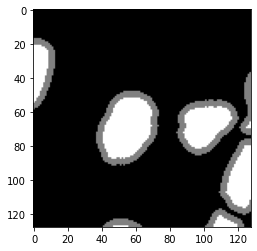

array([0, 1, 2], dtype=uint8)

In [19]:
plt.imshow(y_train[8], cmap='gray')
plt.show()
np.unique(y_train[8])

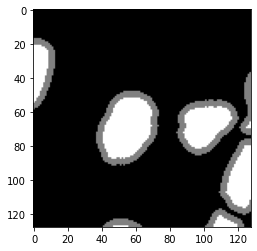

array([0, 1, 2], dtype=uint8)

In [18]:
Mask = y_train[0]

for index2 in range(len(Mask)):
    for index3 in range(len(Mask[index2])):
        Value = Mask[index2][index3]
        if Value == 0:
            Mask[index2][index3] = 0
        elif Value == 128 or Value == 127:
                Mask[index2][index3] = 1
        elif Value == 255 or Value == 254:
                Mask[index2][index3] = 2

plt.imshow(y_train[8], cmap='gray')
plt.show()

np.unique(y_train[8])


y_train 3 classes

In [16]:

for i in range(len(y_train_paths)):
    Mask = y_train[i]

    for index2 in range(len(Mask)):
        for index3 in range(len(Mask[index2])):
            Value = Mask[index2][index3]
            if Value == 0:
                Mask[index2][index3] = 0
            elif Value == 128 or Value == 127:
                    Mask[index2][index3] = 1
            elif Value == 255 or Value == 254:
                    Mask[index2][index3] = 2


In [16]:
X_train[1].shape

(128, 128, 1)

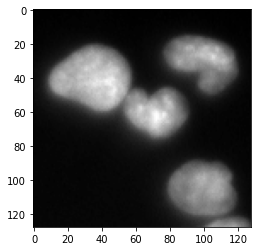

In [8]:
#Montrer une image
from PIL import Image as im
plt.imshow(X_train[2], cmap='gray')
#plt.imshow(y_train[0], cmap='gray')
plt.show()
#data = im.fromarray(X_train[0])
#data.type

In [ ]:
#Montrer une image
from PIL import Image as im
plt.imshow(y_train[0], cmap='gray')
plt.show()
#data = im.fromarray(X_train[0])
#data.type

Modèle à 2 classes

In [53]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model2 = Model(inputs=[inputs], outputs=[outputs])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [55]:
model2.compile(optimizer='adam', loss='binary_crossentropy')
# model2.summary()


In [56]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:GPU:0   Type: GPU


In [ ]:
history = model2.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=50)

Train on 10143 samples, validate on 1128 samples
Epoch 1/50
10143/10143 [==============================] - 21s 2ms/sample - loss: 0.5263 - val_loss: 0.5190
Epoch 2/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.5215 - val_loss: 0.5199
Epoch 3/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.5212 - val_loss: 0.5202
Epoch 4/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.5212 - val_loss: 0.5190
Epoch 5/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.6439 - val_loss: 0.5198
Epoch 6/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.5221 - val_loss: 0.5201
Epoch 7/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.5215 - val_loss: 0.5204
Epoch 8/50
10143/10143 [==============================] - 18s 2ms/sample - loss: 0.5213 - val_loss: 0.5223
Epoch 9/50
10143/10143 [==============================] - 17s 2ms/sample - loss: 0.5211 - val_l

In [19]:
X_test_paths.sort()
for i in range(10):
    print("x_test["+str(i)+"] : "  +X_test_paths[i])

x_test[0] : bio001_split__0.pgm
x_test[1] : bio001_split__1.pgm
x_test[2] : bio001_split__10.pgm
x_test[3] : bio001_split__100.pgm
x_test[4] : bio001_split__101.pgm
x_test[5] : bio001_split__102.pgm
x_test[6] : bio001_split__103.pgm
x_test[7] : bio001_split__104.pgm
x_test[8] : bio001_split__105.pgm
x_test[9] : bio001_split__106.pgm


In [15]:
nb_img=len(X_test_paths)
img_height=128
img_width=128
X_test = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)


for i in range(len(X_test_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/originals/' + X_test_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    X_test[i]=img
X_test.shape

(11271, 128, 128, 1)

In [16]:
nb_img=len(y_test_paths)
img_height=128
img_width=128
y_test = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)


for i in range(len(y_test_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/labels_crop_2colors/' + y_test_paths[i])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    y_test[i]=img
y_test.shape

(11271, 128, 128, 1)

In [26]:
y_test=MergeClass(y_test,2)

In [17]:
predict=model2.predict(X_test)

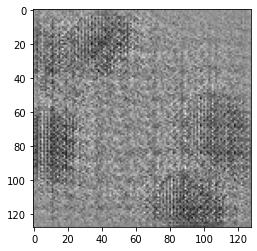

In [18]:
from PIL import Image as im
plt.imshow(predict[0], cmap='gray')
plt.show()


In [27]:
evaluate=model2.evaluate(predict, y_test)

11271/11271 [==============================] - 5s 463us/sample - loss: 4.5252


In [5]:
plt.figure(figsize=(20,20))
nb=np.random.randint(0,624)
for i in range(nb):
    plt.imshow(predict[i],cmap='gray')
    plt.imshow(y_test[i], cmap='gray')
    plt.show()

NameError: name 'predict' is not defined

<Figure size 1440x1440 with 0 Axes>

3 classes

In [25]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(3, (1, 1), activation='sigmoid') (c9)

model3 = Model(inputs=[inputs], outputs=[outputs])
model3.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:

history2 = model3.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=50)